In [135]:
import numpy as np 
import pandas as pd

In [136]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [138]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [140]:
 val = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4']) 

In [141]:
val.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [142]:
val.shape

(5572, 2)

In [143]:
val.isnull().sum()


v1    0
v2    0
dtype: int64

In [144]:
val1 = val.rename(columns={'v1': 'Target', 'v2': 'Text'})

In [145]:
val1.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [146]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [147]:
val1['Target'] = encoder.fit_transform(val1['Target'])


In [148]:
val1.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [149]:
import nltk 

In [150]:
!pip install nltk


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [151]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91887\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [152]:
val1['num_character'] = val1['Text'].apply(len)

In [154]:
val1.head()

,Target,Text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


## number of words

In [155]:
val1['num_words'] = val1['Text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [156]:
val1.head()

,Target,Text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [157]:
val1['num_sent'] = val1['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [158]:
val1.head()

,Target,Text,num_character,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [159]:
print(val1['Target'].unique())



[0 1]


## EDA

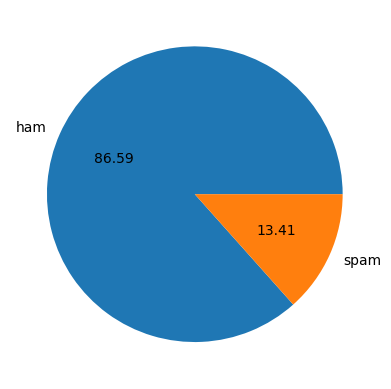

In [162]:
import matplotlib.pyplot as plt
plt.pie(val1['Target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [163]:
 val1[val1['Target'] == 0][['num_character', 'num_words', 'num_sent']].describe()


,num_character,num_words,num_sent
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [164]:
 val1[val1['Target'] == 1][['num_character', 'num_words', 'num_sent']].describe()

,num_character,num_words,num_sent
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [165]:
print(val1[['num_character', 'num_words', 'num_sent']].isnull().sum())


num_character    0
num_words        0
num_sent         0
dtype: int64


<Axes: xlabel='num_character', ylabel='Count'>

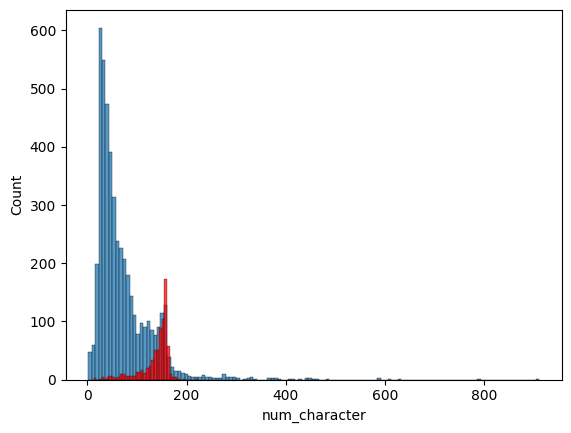

In [166]:
import seaborn as sns
sns.histplot(val1[val1['Target'] == 0]['num_character'])
sns.histplot(val1[val1['Target'] == 1]['num_character'],color='red')

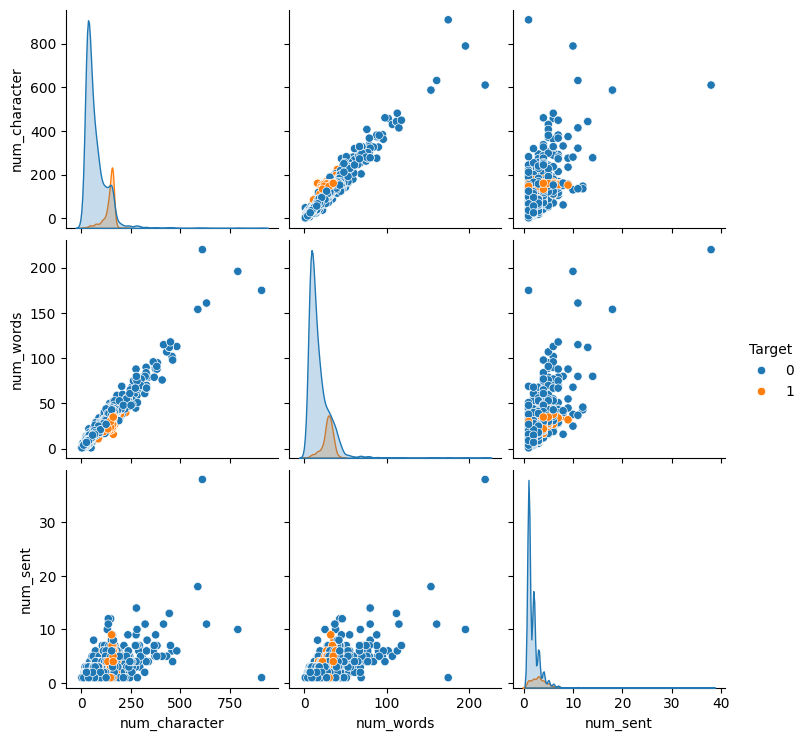

In [167]:
sns.pairplot(val1,hue='Target')

### data preprocessing

#lowercase
#tokenization
#removing special character
#removing stopwords and punctuation
#stemming

In [168]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

def transformation_text(Text):
    ps = PorterStemmer()
    Text = Text.lower()
    words = word_tokenize(Text)
   
    y = []
    for char in words: 
        if char.isalnum():
            y.append(char)
   
    text = y[:]
    y.clear()
    for char in text:
        if char not in stopwords.words('english') and char not in string.punctuation:
            y.append(char)
    
    text = y[:]
    y.clear()
    for char in text:
        y.append(ps.stem(char))
        
    return " ".join(y)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91887\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91887\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [169]:
transformation_text('Running faster helps runners improve their running skills.')

'run faster help runner improv run skill'

In [170]:
val1['Text'].apply(transformation_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Text, Length: 5572, dtype: object

In [171]:
val1['transform_text'] = val1['Text'].apply(transformation_text)

In [172]:
val1.head()

,Target,Text,num_character,num_words,num_sent,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [78]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: wordcloud in c:\users\91887\skunique\lib\site-packages (1.9.4)




[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


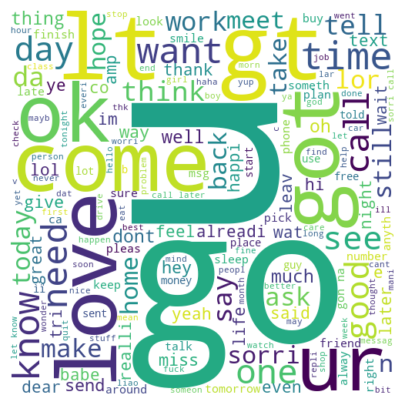

In [79]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure numerical values are integers
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

# Convert 'Target' column to integer
val1['Target'] = val1['Target'].astype(int)

# Extract spam messages and check if empty
spam_text = val1[val1['Target'] == 0]['transform_text'].str.cat(sep=" ")
if not spam_text.strip():
    print("No spam text available!")
else:
    spam_wc = wc.generate(spam_text)

    # Display the word cloud
    plt.figure(figsize=(5, 5))
    plt.imshow(spam_wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()


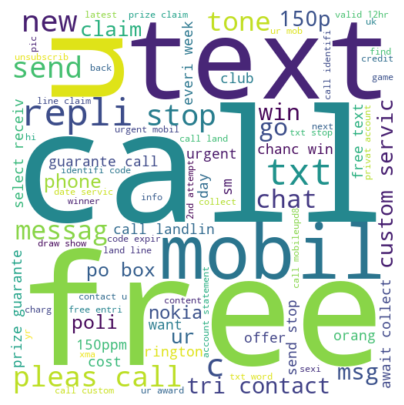

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure numerical values are integers
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

# Convert 'Target' column to integer
val1['Target'] = val1['Target'].astype(int)

# Extract spam messages and check if empty
spam_text = val1[val1['Target'] == 1]['transform_text'].str.cat(sep=" ")
if not spam_text.strip():
    print("No spam text available!")
else:
    spam_wc = wc.generate(spam_text)

    # Display the word cloud
    plt.figure(figsize=(5, 5))
    plt.imshow(spam_wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()


In [81]:
spam_collection = []
for msg in val1[val1['Target'] == 1]['transform_text'].tolist():
     for word in msg.split():
         spam_collection.append(word) 
         

In [82]:
len(spam_collection)

11490

C:\Users\91887\AppData\Local\Temp\ipykernel_13700\151397611.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


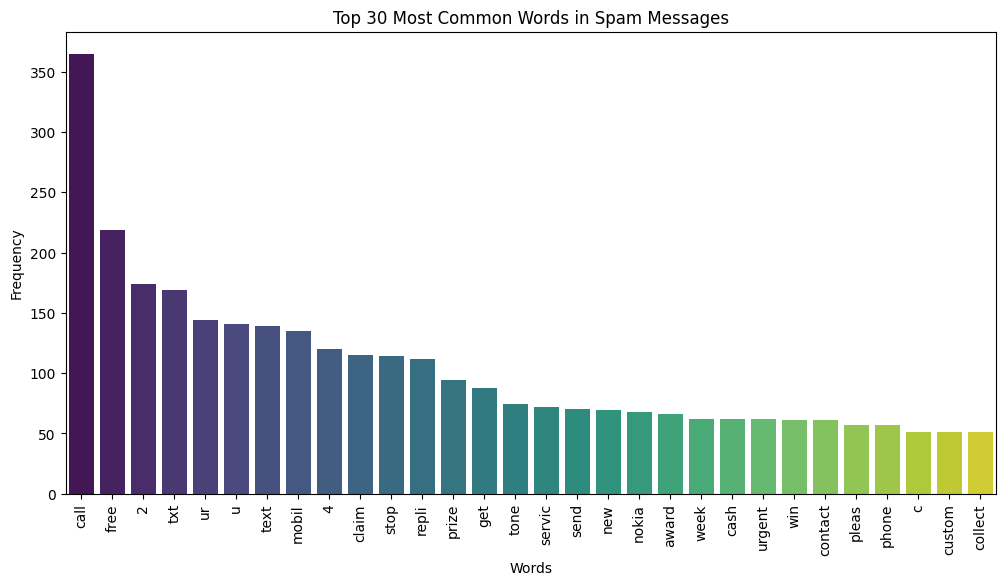

In [83]:

from collections import Counter

# Count the top 30 words
word_counts = Counter(spam_collection).most_common(30)

# Unzip words and their frequencies
words, counts = zip(*word_counts)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")

# Rotate x-axis labels for readability
plt.xticks(rotation='vertical')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Most Common Words in Spam Messages")

# Show the plot
plt.show()


In [84]:
ham_collection = []
for msg in val1[val1['Target'] == 0]['transform_text'].tolist():
     for word in msg.split():
         ham_collection.append(word) 
         

In [85]:
len(ham_collection)

38221

C:\Users\91887\AppData\Local\Temp\ipykernel_13700\2745417636.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


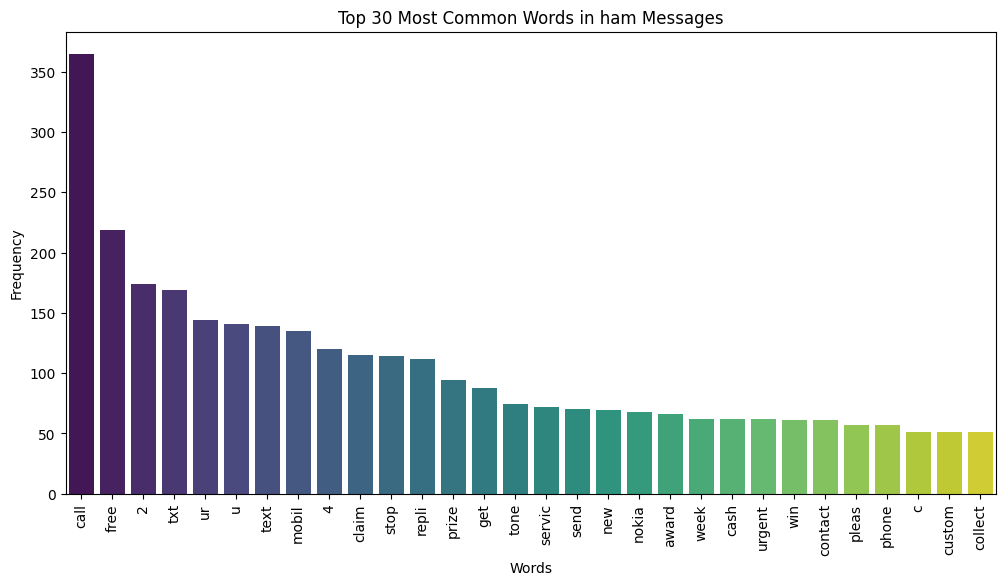

In [86]:

from collections import Counter

# Count the top 30 words
word_counts = Counter(spam_collection).most_common(30)

# Unzip words and their frequencies
words, counts = zip(*word_counts)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")

# Rotate x-axis labels for readability
plt.xticks(rotation='vertical')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Most Common Words in ham Messages")

# Show the plot
plt.show()


## model building

In [87]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(val1['transform_text']).toarray()


In [88]:

X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [90]:
Y = val1['Target'].values

In [91]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y,test_size = 0.2,random_state = 2)

In [105]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [117]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [118]:
gnb.fit(X_train, Y_train)
y_pred_gnb = gnb.predict(X_test)
print("GaussianNB Accuracy:", accuracy_score(Y_test, y_pred_gnb))
print("confusion_matrix:", confusion_matrix(Y_test, y_pred_gnb))
print("precision_score:", precision_score(Y_test, y_pred_gnb))

GaussianNB Accuracy: 0.873542600896861
confusion_matrix: [[843 114]
 [ 27 131]]
precision_score: 0.5346938775510204


In [119]:
mnb.fit(X_train, Y_train)
y_pred_gnb1 = mnb.predict(X_test)
print("multinomialNB Accuracy:", accuracy_score(Y_test, y_pred_gnb1))
print("confusion_matrix:", confusion_matrix(Y_test, y_pred_gnb1))
print("precision_score:", precision_score(Y_test, y_pred_gnb1))

multinomialNB Accuracy: 0.9713004484304932
confusion_matrix: [[942  15]
 [ 17 141]]
precision_score: 0.9038461538461539


In [121]:
bnb.fit(X_train, Y_train)
y_pred_gnb2 = bnb.predict(X_test)
print("bernauliNB Accuracy:", accuracy_score(Y_test, y_pred_gnb2))
print("confusion_matrix:", confusion_matrix(Y_test, y_pred_gnb2))
print("precision_score:", precision_score(Y_test, y_pred_gnb2))

bernauliNB Accuracy: 0.9695067264573991
confusion_matrix: [[956   1]
 [ 33 125]]
precision_score: 0.9920634920634921


## TFIDF

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()


In [123]:
X = tfidf.fit_transform(val1['transform_text']).toarray()


In [124]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [125]:
Y = val1['Target'].values

In [126]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y,test_size = 0.2,random_state = 2)

In [129]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [130]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [131]:
gnb.fit(X_train, Y_train)
y_pred_gnb = gnb.predict(X_test)
print("GaussianNB Accuracy:", accuracy_score(Y_test, y_pred_gnb))
print("confusion_matrix:", confusion_matrix(Y_test, y_pred_gnb))
print("precision_score:", precision_score(Y_test, y_pred_gnb))

GaussianNB Accuracy: 0.8690582959641255
confusion_matrix: [[844 113]
 [ 33 125]]
precision_score: 0.5252100840336135


In [132]:
mnb.fit(X_train, Y_train)
y_pred_gnb1 = mnb.predict(X_test)
print("multinomialNB Accuracy:", accuracy_score(Y_test, y_pred_gnb1))
print("confusion_matrix:", confusion_matrix(Y_test, y_pred_gnb1))
print("precision_score:", precision_score(Y_test, y_pred_gnb1))

multinomialNB Accuracy: 0.957847533632287
confusion_matrix: [[957   0]
 [ 47 111]]
precision_score: 1.0


In [133]:
bnb.fit(X_train, Y_train)
y_pred_gnb2 = bnb.predict(X_test)
print("bernauliNB Accuracy:", accuracy_score(Y_test, y_pred_gnb2))
print("confusion_matrix:", confusion_matrix(Y_test, y_pred_gnb2))
print("precision_score:", precision_score(Y_test, y_pred_gnb2))

bernauliNB Accuracy: 0.9695067264573991
confusion_matrix: [[956   1]
 [ 33 125]]
precision_score: 0.9920634920634921
